In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('counterfeit_transactions.csv')
df.shape

(3000, 20)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           3000 non-null   object 
 1   customer_id              3000 non-null   object 
 2   transaction_date         3000 non-null   object 
 3   customer_age             3000 non-null   int64  
 4   customer_location        3000 non-null   object 
 5   quantity                 3000 non-null   int64  
 6   unit_price               3000 non-null   float64
 7   total_amount             3000 non-null   float64
 8   payment_method           3000 non-null   object 
 9   shipping_speed           3000 non-null   object 
 10  customer_history_orders  3000 non-null   int64  
 11  discount_applied         3000 non-null   bool   
 12  discount_percentage      3000 non-null   float64
 13  shipping_cost            3000 non-null   float64
 14  delivery_time_days      

In [5]:
df.drop(columns=[
    'transaction_id', 'customer_id', 'transaction_date'
], inplace=True)

In [6]:
df.head()

,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
0,22,JP,1,199.66,199.66,Debit Card,Express,17,False,0.0,5.39,26,False,False,False,False,False
1,62,DE,4,116.01,464.03,PayPal,Express,36,False,0.0,8.18,25,False,False,False,False,False
2,75,DE,1,42.04,42.04,Credit Card,Priority,21,False,0.0,8.61,27,False,False,False,False,False
3,56,BR,3,147.69,443.08,Credit Card,Standard,14,True,48.7,17.00,26,False,False,False,False,False
4,19,IN,4,40.70,162.80,PayPal,Priority,48,False,0.0,20.53,1,False,False,True,False,False


In [7]:
df.duplicated().sum()

0

In [8]:
payment_methods_count = df['payment_method'].value_counts().reset_index()

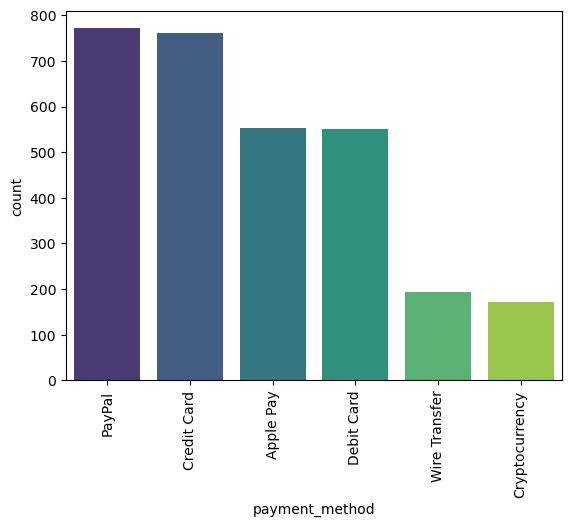

In [9]:
sns.barplot(
    data=payment_methods_count,
    x='payment_method',
    y='count',
    palette='viridis'
)
plt.xticks(rotation=90)
plt.show()

In [10]:
shipping_speed_count = df['shipping_speed'].value_counts().reset_index()

<Axes: xlabel='shipping_speed', ylabel='count'>

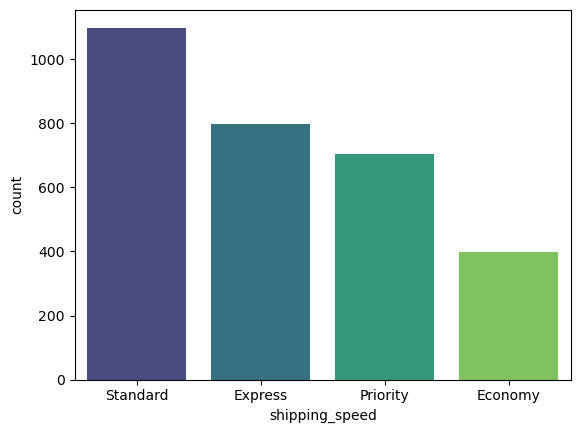

In [11]:
sns.barplot(
    data=shipping_speed_count,
    x='shipping_speed',
    y='count',
    palette='viridis'
)

In [12]:
df.head()

,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
0,22,JP,1,199.66,199.66,Debit Card,Express,17,False,0.0,5.39,26,False,False,False,False,False
1,62,DE,4,116.01,464.03,PayPal,Express,36,False,0.0,8.18,25,False,False,False,False,False
2,75,DE,1,42.04,42.04,Credit Card,Priority,21,False,0.0,8.61,27,False,False,False,False,False
3,56,BR,3,147.69,443.08,Credit Card,Standard,14,True,48.7,17.00,26,False,False,False,False,False
4,19,IN,4,40.70,162.80,PayPal,Priority,48,False,0.0,20.53,1,False,False,True,False,False


In [13]:
encoder = LabelEncoder()

df['customer_location'] = encoder.fit_transform(df['customer_location'])
df['payment_method'] = encoder.fit_transform(df['payment_method'])
df['shipping_speed'] = encoder.fit_transform(df['shipping_speed'])
df['discount_applied'] = encoder.fit_transform(df['discount_applied'])
df['refund_requested'] = encoder.fit_transform(df['refund_requested'])
df['velocity_flag'] = encoder.fit_transform(df['velocity_flag'])
df['geolocation_mismatch'] = encoder.fit_transform(df['geolocation_mismatch'])
df['device_fingerprint_new'] = encoder.fit_transform(df['device_fingerprint_new'])
df['involves_counterfeit'] = encoder.fit_transform(df['involves_counterfeit'])

In [14]:
df.head()

,customer_age,customer_location,quantity,unit_price,total_amount,payment_method,shipping_speed,customer_history_orders,discount_applied,discount_percentage,shipping_cost,delivery_time_days,refund_requested,velocity_flag,geolocation_mismatch,device_fingerprint_new,involves_counterfeit
0,22,7,1,199.66,199.66,3,1,17,0,0.0,5.39,26,0,0,0,0,0
1,62,3,4,116.01,464.03,4,1,36,0,0.0,8.18,25,0,0,0,0,0
2,75,3,1,42.04,42.04,1,2,21,0,0.0,8.61,27,0,0,0,0,0
3,56,1,3,147.69,443.08,1,3,14,1,48.7,17.00,26,0,0,0,0,0
4,19,6,4,40.70,162.80,4,2,48,0,0.0,20.53,1,0,0,1,0,0


In [15]:
X = df.drop(columns='involves_counterfeit')
y = df['involves_counterfeit']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### Classification using LogisticRegression

In [17]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = lr_model.predict(X_test)

In [19]:
print(confusion_matrix(y_pred, y_test))

[[449   9]
 [  7 135]]


In [20]:
round(accuracy_score(y_test, y_pred),2)

0.97

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       456
           1       0.95      0.94      0.94       144

    accuracy                           0.97       600
   macro avg       0.97      0.96      0.96       600
weighted avg       0.97      0.97      0.97       600



### Classification using SVM (Support Vector Classification SVC)

In [22]:
# Find optimal C value through cross-validation
param_grid = {'C': [0.1, 1, 10, 100, 150],
            'kernel': ['linear']}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best C value: {grid_search.best_params_['C']}")

Best C value: 0.1


In [23]:
svm_model = SVC(C=0.1, kernel='linear')
svm_model.fit(X_train, y_train)

SVC(C=0.1, kernel='linear')

In [42]:
print(f"Training data score : {svm_model.score(X_train, y_train):.2f}")
print(f"Test data score : {svm_model.score(X_test, y_test):.2f}")

Training data score : 0.98
Test data score : 0.98


### Classification using KNeighborsClassifier

In [37]:
kn_model = KNeighborsClassifier(n_neighbors=10)
kn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [43]:
print(f"Training data score : {kn_model.score(X_train, y_train):.2f}")
print(f"Test data score : {kn_model.score(X_test, y_test):.2f}")

Training data score : 0.97
Test data score : 0.96


### Classification using DecisionTreeClassifier

In [39]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [44]:
print(f"Training data score : {dt_model.score(X_train, y_train):.2f}")
print(f"Test data score: {dt_model.score(X_test, y_test):.2f}")

Training data score : 0.99
Test data score: 1.00


### Classification using naive_bayes (GaussianNB)

In [45]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [47]:
print(f"Training data score: {nb_model.score(X_train, y_train):.2f}")
print(f"Test data score: {nb_model.score(X_test, y_test):.2f}")

Training data score: 0.98
Test data score: 0.98


In [49]:
lr_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [51]:
svm_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [53]:
kn_model.predict(X_test)[:10]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int64)

In [54]:
dt_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)

In [55]:
nb_model.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0], dtype=int64)